<a href="https://colab.research.google.com/github/towfeeqf/DL-practice-problems/blob/master/maleVsfemale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a **Convolution Neural Network**: Male Vs Female

Neural Network :

It is a machine learning algorithm, which is built on the prinicple of the organization and functioning of biological neural networks. Neurons are located in a serios of groups - layers

Convolution Neural Networks (CNNs):
 It is a Deep learning algorithm which can take an input image, assign importance(learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

 Pre-processing required in a ConvNet is much lower as compared to other classification algoithms.

 While in primitive methods, filers are hand-engineered, with enough training, ConvNet have the aility to learn these filters/characterisitics. 

 CNN process images using matrices of weights called filters(features) that detect specific attributes such as vertical edges, horizontal edges, etc . morever as the image progresses through each layer, the filters are able to recognise more complex attributes. 

 The ultimate goal of the CNN is to detect what is goin on in the scene


Input: A matrix of pixel values in the shape of [Width, height, channels]

Convolution - The ultimate purpose of this layer is to recieve a **feature map**.

Usually we start with low-number of filters for low-level feature detection.

The deeper we go into the CNN, the more filters(usually they are also smaller) we use to detect high-level features.



Pooling Layer: Similar to convolution layer, the pooling layer is reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction.

Furthermore, it is useful for extracting dominant featues which are rotational and positional invariant, thus maintaining the process of effectively training of the model.

There are two types of pooling:
Max pooling and Average pooling

Max pooling: returns the max value from the portion of the image covered by the kernel. 
Average pooling: returns the average of all the values from the portion of the image covered by the kernel

Activation:
We will be using ReLU activation function that returns a 0 for every negative value in the input image while it returns the same value for positive value.

Fully Connected layer:

In a fully connected layer, we flatten the output of the last convolution layer, and connect every node of the current layer with the other node of the next layer.

Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in the regulat Neural Networks and work in a similar way. 

The last layer of our CNN will compute the class probability scores, resulting in a volume of size [1 * 1 * number of classes]


There are various architectures of CNNs available which have been key in building algorithms. 
Some of them are:
1. LeNet
2. AlexNet
3. VGGNet
4. GoogleNet
5. ResNet

We shall be using the VGG16 Model. 

1. the n/w contains a total of 16 layers in whihc weights and bias parameters are learned.
2. 13 Conv layers are stacked one after the other and 3 dense layers for classification
3. number of filters in the conv layers follow an increasing pattern ( similar to decoder architecture of autoencoder)
4.  the informative features are obtained by **max-pooling layers** applied at different steps in the architecture  
5. the dense layers comprise of 4096, 4096 and 1000 nodes each.
6. the cons of this architecture are that it is slow to train and produces the model with a very large size



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
files.upload() # this will prompt you to uploadd the kaggle json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"towfeeqf","key":"6fb2587be12e04897e8a2a66559af8c5"}'}

Download the required Dataset on the google drive

!kaggle competitions download -c ‘name_of_competition’ -p “target_colab_dir”

In [0]:
!kaggle datasets download -d "gender-and-age" 

404 - Not Found


In [0]:
  import os
os.environ['KAGGLE_USERNAME'] = "towfeeqf" # username from the json file
os.environ['KAGGLE_KEY'] = "6fb2587be12e04897e8a2a66559af8c5" # key from the json file
!kaggle datasets download -d shadabhussain/gender-and-age -p "drive/My Drive/kaggle/GenderAge" # api copied from kaggle

 95% 70.0M/74.0M [00:00<00:00, 111MB/s] 
100% 74.0M/74.0M [00:00<00:00, 116MB/s]


In [0]:
import os
os.chdir('drive/My Drive/kaggle/GenderAge')  #chdir

#!unzip -q gender-and-age.zip -d GA/ #unzip data into GA

In [3]:
pwd

'/content/drive/My Drive/kaggle/GenderAge'

In [0]:
os.chdir('GA')

In [5]:
ls

final/  results.csv


In [6]:
pwd

'/content/drive/My Drive/kaggle/GenderAge/GA'

Now that we have downloaded the kaggle data set,
we will observe the data present in the 
**"/content/drive/My Drive/kaggle/GenderAge/GA "** folder


We import various important packages and with the fly we shall import other library packages


In [7]:
import pandas as pd
import numpy as np
import cv2
import random

%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import ticker
import seaborn as sns

%matplotlib inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Preparing the data

prepare the data using the results.csv file

Loading labels for each image

In [8]:
ls

final/  results.csv


In [0]:
labels = pd.read_csv('results.csv')

In [10]:
labels.head()

,Filename,Gender,Age
0,Raw_0001_001_20050913115022_Portrait.png,1,1
1,Raw_0002_002_20050913094354_Portrait.png,1,1
2,Raw_0003_003_20050913094955_Portrait.png,0,0
3,Raw_0005_004_20050913101316_Portrait.png,1,1
4,Raw_0007_005_20050913093707_Portrait.png,0,1


#We are working to get the Gender from a given picture.

So we cut short the dataframe till Gender column only

In [11]:
glabels= labels.iloc[:,0:2]
glabels.head()

,Filename,Gender
0,Raw_0001_001_20050913115022_Portrait.png,1
1,Raw_0002_002_20050913094354_Portrait.png,1
2,Raw_0003_003_20050913094955_Portrait.png,0
3,Raw_0005_004_20050913101316_Portrait.png,1
4,Raw_0007_005_20050913093707_Portrait.png,0


Collecting and Seperating the male data ( first by observing in the folder, it is observed that Gender 1 represents Females where as 0 represents Males)

In [12]:
# Seperating male data

male_data = glabels[glabels['Gender']==0]
male_data.head()

,Filename,Gender
2,Raw_0003_003_20050913094955_Portrait.png,0
4,Raw_0007_005_20050913093707_Portrait.png,0
5,Raw_0009_006_20050913122608_Portrait.png,0
6,Raw_0010_007_20050913094809_Portrait.png,0
7,Raw_0011_008_20050913123954_Portrait.png,0


In [13]:
male_data.shape

(84, 2)

In [14]:
#Sampling male_data into train and test 

#test_male_data = male_data.iloc[-3:,:]
#train_male_data = male_data.iloc[:-3,:]



print(male_data.iloc[-3:,:].shape)
print(male_data.iloc[:-3,:].shape)

(3, 2)
(81, 2)


In [16]:
female_data = glabels[glabels['Gender']==1]
female_data.head()

,Filename,Gender
0,Raw_0001_001_20050913115022_Portrait.png,1
1,Raw_0002_002_20050913094354_Portrait.png,1
3,Raw_0005_004_20050913101316_Portrait.png,1
9,Raw_0014_010_20050913093018_Portrait.png,1
22,Raw_0039_023_20050913110844_Portrait.png,1


In [17]:
female_data.shape

(32, 2)

In [0]:
# Splitting male data into train and test
test_male_data = male_data.iloc[-5:,:]
train_male_data = male_data.iloc[:-5,:]

In [0]:
# Splitting female data into train and test
test_female_data = female_data.iloc[-5:,:]
train_female_data = female_data.iloc[:-5,:]

It is very clear that Male count is 84 where as female count is 32 only.




splitting male_data into test and train

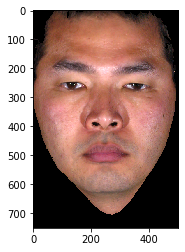

In [20]:
#Plot the sample image

img = mpimg.imread('final/final/Raw_0016_011_20050913100034_Portrait.png')
imgplot = plt.imshow(img)
plt.show()


In [0]:
#combining test_male_data and test_female_data and creating a final test_data

In [46]:
#total test data

test_indices = test_female_data.index.tolist()+test_male_data.index.tolist()
test_data = glabels.iloc[test_indices,:]

test_data

# this will give all the test data 

# train data is equal to glabels data - test data


,Filename,Gender
97,Raw_0356_098_20050913172749_Portrait.png,1
99,Raw_0385_100_20050912175151_Portrait.png,1
100,Raw_0471_101_20050912225308_Portrait.png,1
108,Raw_0853_111_20050913155042_Portrait.png,1
111,Raw_0939_114_20050912231742_Portrait.png,1
110,Raw_0907_113_20050912172937_Portrait.png,0
112,Raw_0985_115_20050912172818_Portrait.png,0
113,Raw_1074_116_20050912184026_Portrait.png,0
114,Raw_1147_117_20050913192322_Portrait.png,0
115,Raw_1149_118_20050912204835_Portrait.png,0


In [47]:
glabels.shape

(116, 2)

In [48]:
test_data.shape

(10, 2)

In [55]:
test_data.index  

Int64Index([97, 99, 100, 108, 111, 110, 112, 113, 114, 115], dtype='int64')

In [56]:
glabels.index

RangeIndex(start=0, stop=116, step=1)

In [0]:
train_data1 = glabels.drop(test_data.index)

In [98]:
train_data1

,Filename,Gender
0,Raw_0001_001_20050913115022_Portrait.png,1
1,Raw_0002_002_20050913094354_Portrait.png,1
2,Raw_0003_003_20050913094955_Portrait.png,0
3,Raw_0005_004_20050913101316_Portrait.png,1
4,Raw_0007_005_20050913093707_Portrait.png,0
...,...,...
104,Raw_0645_108_20050912204750_Portrait.png,0
105,Raw_0647_107_20050913155224_Portrait.png,0
106,Raw_0695_109_20050912174416_Portrait.png,0
107,Raw_0768_110_20050912173601_Portrait.png,0


In [99]:
train_data1.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             96,  98, 101, 102, 103, 104, 105, 106, 107, 109],
           dtype='int64', length=106)

In [100]:
test_data.index

Int64Index([97, 99, 100, 108, 111, 110, 112, 113, 114, 115], dtype='int64')

Also othe method of getting the train_data by dropping the test_data from the glabels (whole set)

we have


In [0]:
#train_data2= pd.concat(glabels,test_datacopy=False,)

train_data2= pd.concat([glabels,test_data]).drop_duplicates(keep=False)

In [110]:
train_data2

,Filename,Gender
0,Raw_0001_001_20050913115022_Portrait.png,1
1,Raw_0002_002_20050913094354_Portrait.png,1
2,Raw_0003_003_20050913094955_Portrait.png,0
3,Raw_0005_004_20050913101316_Portrait.png,1
4,Raw_0007_005_20050913093707_Portrait.png,0
...,...,...
104,Raw_0645_108_20050912204750_Portrait.png,0
105,Raw_0647_107_20050913155224_Portrait.png,0
106,Raw_0695_109_20050912174416_Portrait.png,0
107,Raw_0768_110_20050912173601_Portrait.png,0


In [111]:
train_data2.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             96,  98, 101, 102, 103, 104, 105, 106, 107, 109],
           dtype='int64', length=106)

In [112]:
train_data1.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             96,  98, 101, 102, 103, 104, 105, 106, 107, 109],
           dtype='int64', length=106)

In [113]:
train_data1

,Filename,Gender
0,Raw_0001_001_20050913115022_Portrait.png,1
1,Raw_0002_002_20050913094354_Portrait.png,1
2,Raw_0003_003_20050913094955_Portrait.png,0
3,Raw_0005_004_20050913101316_Portrait.png,1
4,Raw_0007_005_20050913093707_Portrait.png,0
...,...,...
104,Raw_0645_108_20050912204750_Portrait.png,0
105,Raw_0647_107_20050913155224_Portrait.png,0
106,Raw_0695_109_20050912174416_Portrait.png,0
107,Raw_0768_110_20050912173601_Portrait.png,0


In [114]:
train_data2

,Filename,Gender
0,Raw_0001_001_20050913115022_Portrait.png,1
1,Raw_0002_002_20050913094354_Portrait.png,1
2,Raw_0003_003_20050913094955_Portrait.png,0
3,Raw_0005_004_20050913101316_Portrait.png,1
4,Raw_0007_005_20050913093707_Portrait.png,0
...,...,...
104,Raw_0645_108_20050912204750_Portrait.png,0
105,Raw_0647_107_20050913155224_Portrait.png,0
106,Raw_0695_109_20050912174416_Portrait.png,0
107,Raw_0768_110_20050912173601_Portrait.png,0


Lets see the count of male vs females

In [115]:
print(male_data.shape)
print(female_data.shape)

(84, 2)
(32, 2)


In [133]:



glabels.Gender.value_counts().plot(kind='bar',color=colors)

NameError: ignored

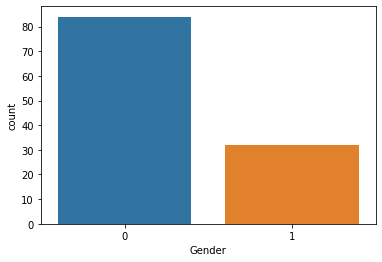

In [122]:
sns.countplot(x='Gender', data=glabels)

Preparing Image Files

In this step we are resizing the images to a 6x64 to run efficinetly. Also we are splitting male and female images for exploratory analysis
